#Simple Linear regression is:
What is the effect of Facebook advertising on the company’s sales, given the effects of TV advertising?

# Multiple Linear Regression is:
What is effects of Facebook advertising on company sales given the advertising budgets for TV, radio and newspaper advertising

**Equation: Y = β0 + β1X1 + β2X2 + β3X3 + … + βnXn + e**


Y = Dependent variable / Target variable

β0 = the y-intercept (value of y when all other parameters are set to 0)

β1X1 = the regression coefficient (β1) of the first independent variable (X1) (a.k.a. the effect that increasing the value of the independent variable has on the predicted y value)
.....

βnXn= the regression coefficient of the last independent variable

**β1, β2, β3, …. βn = Slope of the regression line which tells whether the line is increasing or decreasing**

X1, X2, X3, ….Xn = Independent variable / Predictor variable

e = model error (a.k.a. how much variation there is in our estimate of y)

#Problem Statement:
Build a Multiple Linear Regression Model to predict sales based on the money spent on TV, Radio, and Newspaper for advertising.

# **Load the libraries**

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The dataset is in the CSV (Comma-Separated Values) format. Hence, we use pd.read_csv()to read the dataset.

# Equation: Sales = β0 + (β1 * TV) + (β2 * Radio) + (β3 * Newspaper) + e
# **Reading the dataset **

In [2]:
dataset = pd.read_csv("Assignment 2 Advertising.csv")
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
dataset = dataset.iloc[: , 1:]

In [4]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
dataset.shape

(200, 4)

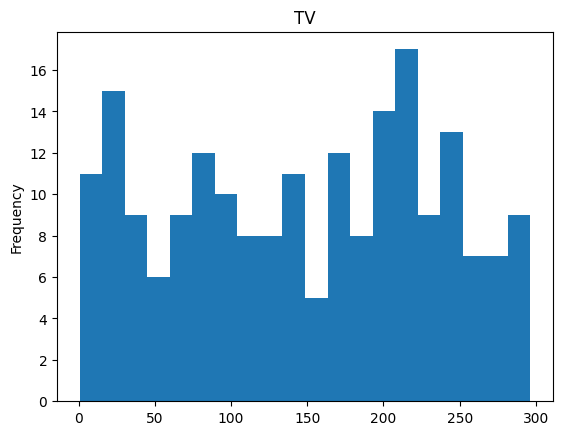

In [8]:
# TV

from matplotlib import pyplot as plt
dataset['TV'].plot(kind='hist', bins=20, title='TV')
plt.show()

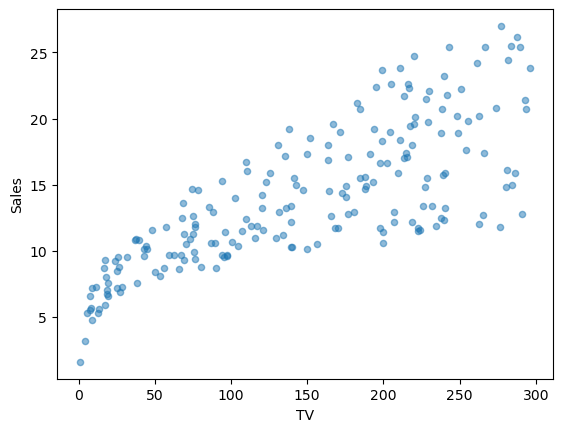

In [6]:
# TV vs Sales

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='TV', y='Sales', alpha=0.5)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

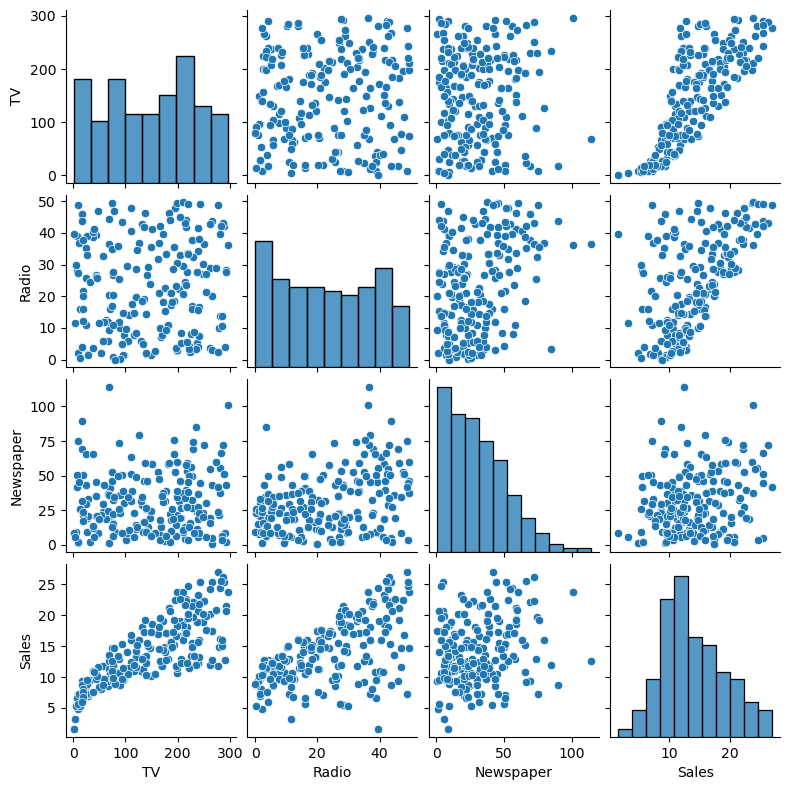

In [16]:
sns.pairplot(data = dataset,height = 2)

#Checking for Multicollinearity using VIF

*   VIF starts at 1 and has no upper limit
*   VIF = 1, no correlation between the independent variable and the other variables
*   VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others







In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]
    vif.index = X.columns  
    return vif  

In [12]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [14]:
X = dataset.iloc[:,:-1]
calc_vif(X)

,VIF
TV,2.486772
Radio,3.285462
Newspaper,3.055245


Setting the values for independent (X) variable and dependent (Y) variable
#Setting the value for X and Y

In [7]:
x = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

In [8]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [18]:
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


#Splitting the dataset into train and test set
#random_state: This parameter controls the shuffling applied to the data before applying the split.

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

# **Implementing the linear model**

In [10]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

# Model **Equation**

In [11]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:",mlr.coef_)
list(zip(x, mlr.coef_))

Intercept:  2.979067338122629
Coefficients: [0.04472952 0.18919505 0.00276111]


[('TV', 0.044729517468716326),
 ('Radio', 0.18919505423437655),
 ('Newspaper', 0.0027611143413671757)]

# **Prediction on the test set**

In [12]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [16.4080242  20.88988209 21.55384318 10.60850256 22.11237326 13.10559172
 21.05719192  7.46101034 13.60634581 15.15506967  9.04831992  6.65328312
 14.34554487  8.90349333  9.68959028 12.16494386  8.73628397 16.26507258
 10.27759582 18.83109103 19.56036653 13.25103464 12.33620695 21.30695132
  7.82740305  5.80957448 20.75753231 11.98138077  9.18349576  8.5066991
 12.46646769 10.00337695 21.3876709  12.24966368 18.26661538 20.13766267
 14.05514005 20.85411186 11.0174441   4.56899622]


# **Actual values and the predicted values**

In [13]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
95,16.9,16.408024
15,22.4,20.889882
30,21.4,21.553843
158,7.3,10.608503
128,24.7,22.112373


# **Evaluating the Model**

In [14]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 89.67
Mean Absolute Error: 1.4607567168117606
Mean Square Error: 3.1740973539761046
Root Mean Square Error: 1.7815996615334502


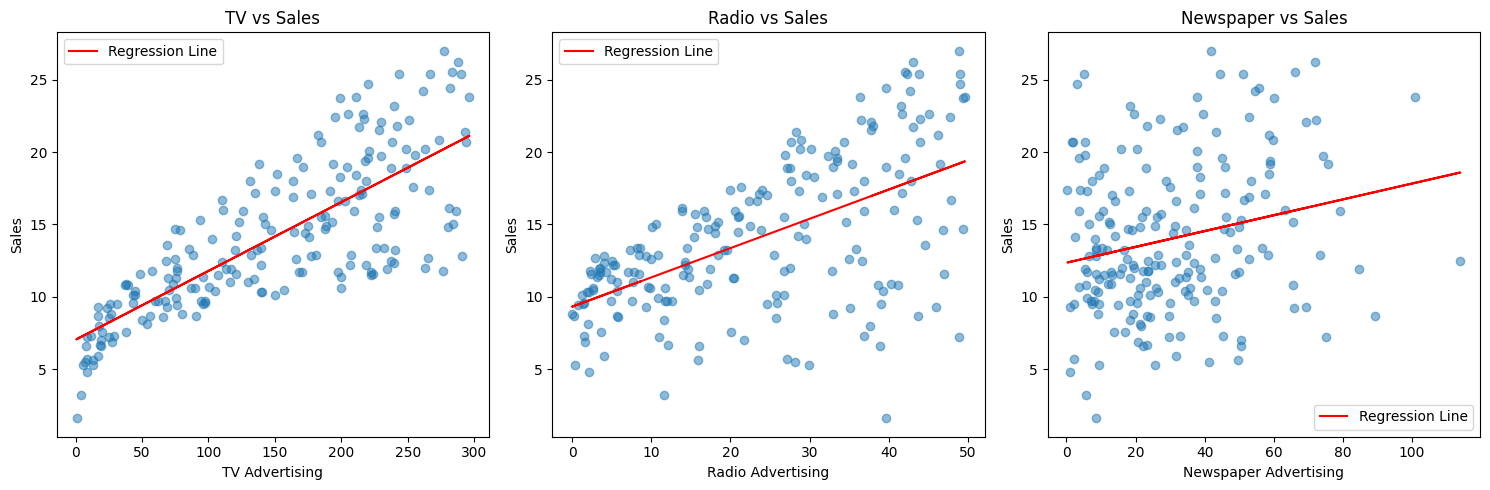

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns of subplots

# Function to plot scatter plot with regression line
def plot_scatter_with_regression(ax, x_data, y_data, x_label, title):
    ax.scatter(x_data, y_data, alpha=0.5)

    # Calculate regression line
    slope, intercept = np.polyfit(x_data, y_data, 1)
    regression_line = slope * x_data + intercept

    ax.plot(x_data, regression_line, color='red', label='Regression Line')

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel('Sales')
    ax.legend()  # Show legend for regression line

# Scatter plot for TV vs Sales
plot_scatter_with_regression(axes[0], dataset['TV'], dataset['Sales'], 'TV Advertising', 
                             'TV vs Sales')

# Scatter plot for Radio vs Sales
plot_scatter_with_regression(axes[1], dataset['Radio'], dataset['Sales'], 'Radio Advertising', 
                             'Radio vs Sales')

# Scatter plot for Newspaper vs Sales
plot_scatter_with_regression(axes[2], dataset['Newspaper'], dataset['Sales'], 'Newspaper Advertising', 
                             'Newspaper vs Sales')

plt.tight_layout()
plt.show()